In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
directory = "./results/mdi_local.real_x_sim_y.diabetes-regression.linear-model/diabetes-reg-hierpoly/varying_heritability_sample_row_n/"
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [8]:
combined_df

,rep,sample_row_n,sample_row_n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,include_raw,cv_ridge,calc_loo_coef,sample_split,fit_on,model,fi,train_size,test_size,num_features,data_split_seed,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,ablation_seed_0,fi_time,train_AUROC,train_AUPRC,train_F1,test_AUROC,test_AUPRC,test_F1,split_seed,rf_model,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32
0,0,100,100,0.1,0.1,100.0,1.0,sqrt,42.0,NaN,NaN,False,oob,test,RF,LFI_with_raw_OOB_RF,67,33,10,2,36,16,4,9,45,40,61,5,64,12,25,59,28,0,62,34,29,5,2,19,27,16,22,6,5371,16.394167,0.752604,0.847491,0.522592,0.770833,0.869907,0.541667,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,100,100,0.1,0.1,100.0,1.0,sqrt,42.0,NaN,NaN,NaN,NaN,NaN,RF,LFI_with_raw_RF,67,33,10,2,36,16,4,9,45,40,61,5,64,12,25,59,28,0,62,34,29,5,2,19,27,16,22,6,5371,17.529187,0.661458,0.798983,0.664165,0.682292,0.810425,0.720484,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,100,100,0.1,0.1,100.0,1.0,sqrt,42.0,False,0.0,False,inbag,NaN,RF,MDI_RF,67,33,10,2,36,16,4,9,45,40,61,5,64,12,25,59,28,0,62,34,29,5,2,19,27,16,22,6,5371,8.725140,0.567708,0.713682,0.681767,0.609375,0.758722,0.663172,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,100,100,0.1,0.1,100.0,1.0,sqrt,42.0,NaN,NaN,NaN,NaN,NaN,RF,TreeSHAP_RF,67,33,10,2,36,16,4,9,45,40,61,5,64,12,25,59,28,0,62,34,29,5,2,19,27,16,22,6,5371,0.250836,0.502604,0.705510,0.602102,0.552083,0.728001,0.616987,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
methods = combined_df["fi"].unique().tolist()
sample_row_n = combined_df["sample_row_n"].unique().tolist()
sample_row_n.sort()
heritability = combined_df["heritability"].unique().tolist()
heritability.sort()
seeds = combined_df["split_seed"].unique()
seeds.sort()
results = {}
for r in seeds:
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["test_auroc"] = []
            results[r][h][m]["test_f1"] = []
            results[r][h][m]["test_auprc"] = []
            results[r][h][m]["train_auroc"] = []
            results[r][h][m]["train_f1"] = []
            results[r][h][m]["train_auprc"] = []


In [4]:
for r in seeds:
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["sample_row_n"] == s) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                assert len(df_sub["test_AUROC"].unique()) == 1
                assert len(df_sub["train_AUROC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                results[r][h][m]["test_auroc"].append(df_sub["test_AUROC"].unique()[0])
                results[r][h][m]["train_auroc"].append(df_sub["train_AUROC"].unique()[0])
                results[r][h][m]["test_auprc"].append(df_sub["test_AUPRC"].unique()[0])
                results[r][h][m]["train_auprc"].append(df_sub["train_AUPRC"].unique()[0])
                results[r][h][m]["test_f1"].append(df_sub["test_F1"].unique()[0])
                results[r][h][m]["train_f1"].append(df_sub["train_F1"].unique()[0])

In [5]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["test_auroc"] = []
        agg_results[h][m]["train_auroc"] = []
        agg_results[h][m]["test_auprc"] = []
        agg_results[h][m]["train_auprc"] = []
        agg_results[h][m]["test_f1"] = []
        agg_results[h][m]["train_f1"] = []

In [6]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            test_auroc = 0
            train_auroc = 0
            test_auprc = 0
            train_auprc = 0
            test_f1 = 0
            train_f1 = 0
            for r in range(1, 11):
                df_sub = combined_df[(combined_df["fi"] == m) & (combined_df["sample_row_n"] == s) & (combined_df["heritability"] == h) & (combined_df["split_seed"] == r)]
                assert len(df_sub["test_AUROC"].unique()) == 1
                assert len(df_sub["train_AUROC"].unique()) == 1
                assert len(df_sub["test_AUPRC"].unique()) == 1
                assert len(df_sub["train_AUPRC"].unique()) == 1
                assert len(df_sub["train_F1"].unique()) == 1
                assert len(df_sub["test_F1"].unique()) == 1
                test_auroc += df_sub["test_AUROC"].unique()[0]
                train_auroc += df_sub["train_AUROC"].unique()[0]
                test_auprc += df_sub["test_AUPRC"].unique()[0]
                train_auprc += df_sub["train_AUPRC"].unique()[0]
                test_f1 += df_sub["test_F1"].unique()[0]
                train_f1 += df_sub["train_F1"].unique()[0]
            test_auroc /= 10
            train_auroc /= 10
            test_auprc /= 10
            train_auprc /= 10
            test_f1 /= 10
            train_f1 /= 10
            agg_results[h][m]["test_auroc"].append(test_auroc)
            agg_results[h][m]["train_auroc"].append(train_auroc)
            agg_results[h][m]["test_auprc"].append(test_auprc)
            agg_results[h][m]["train_auprc"].append(train_auprc)
            agg_results[h][m]["test_f1"].append(test_f1)
            agg_results[h][m]["train_f1"].append(train_f1)

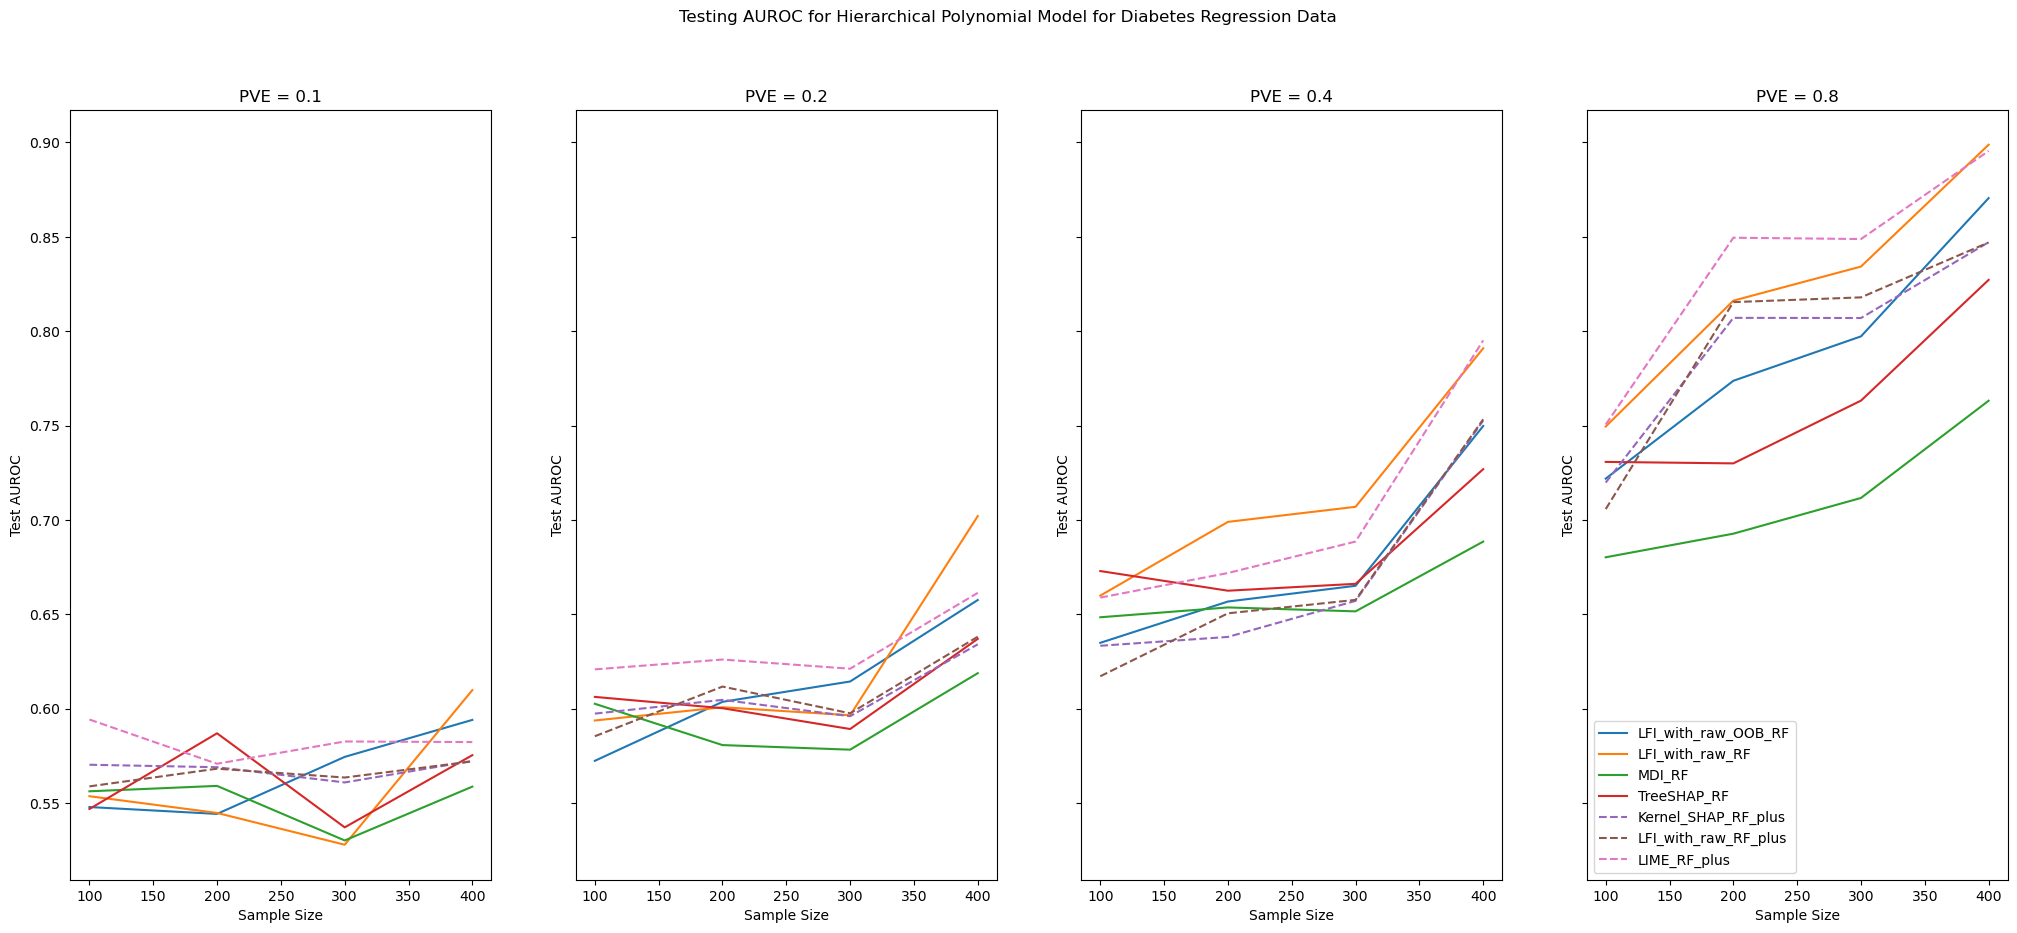

In [7]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auroc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auroc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Test AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Testing AUROC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

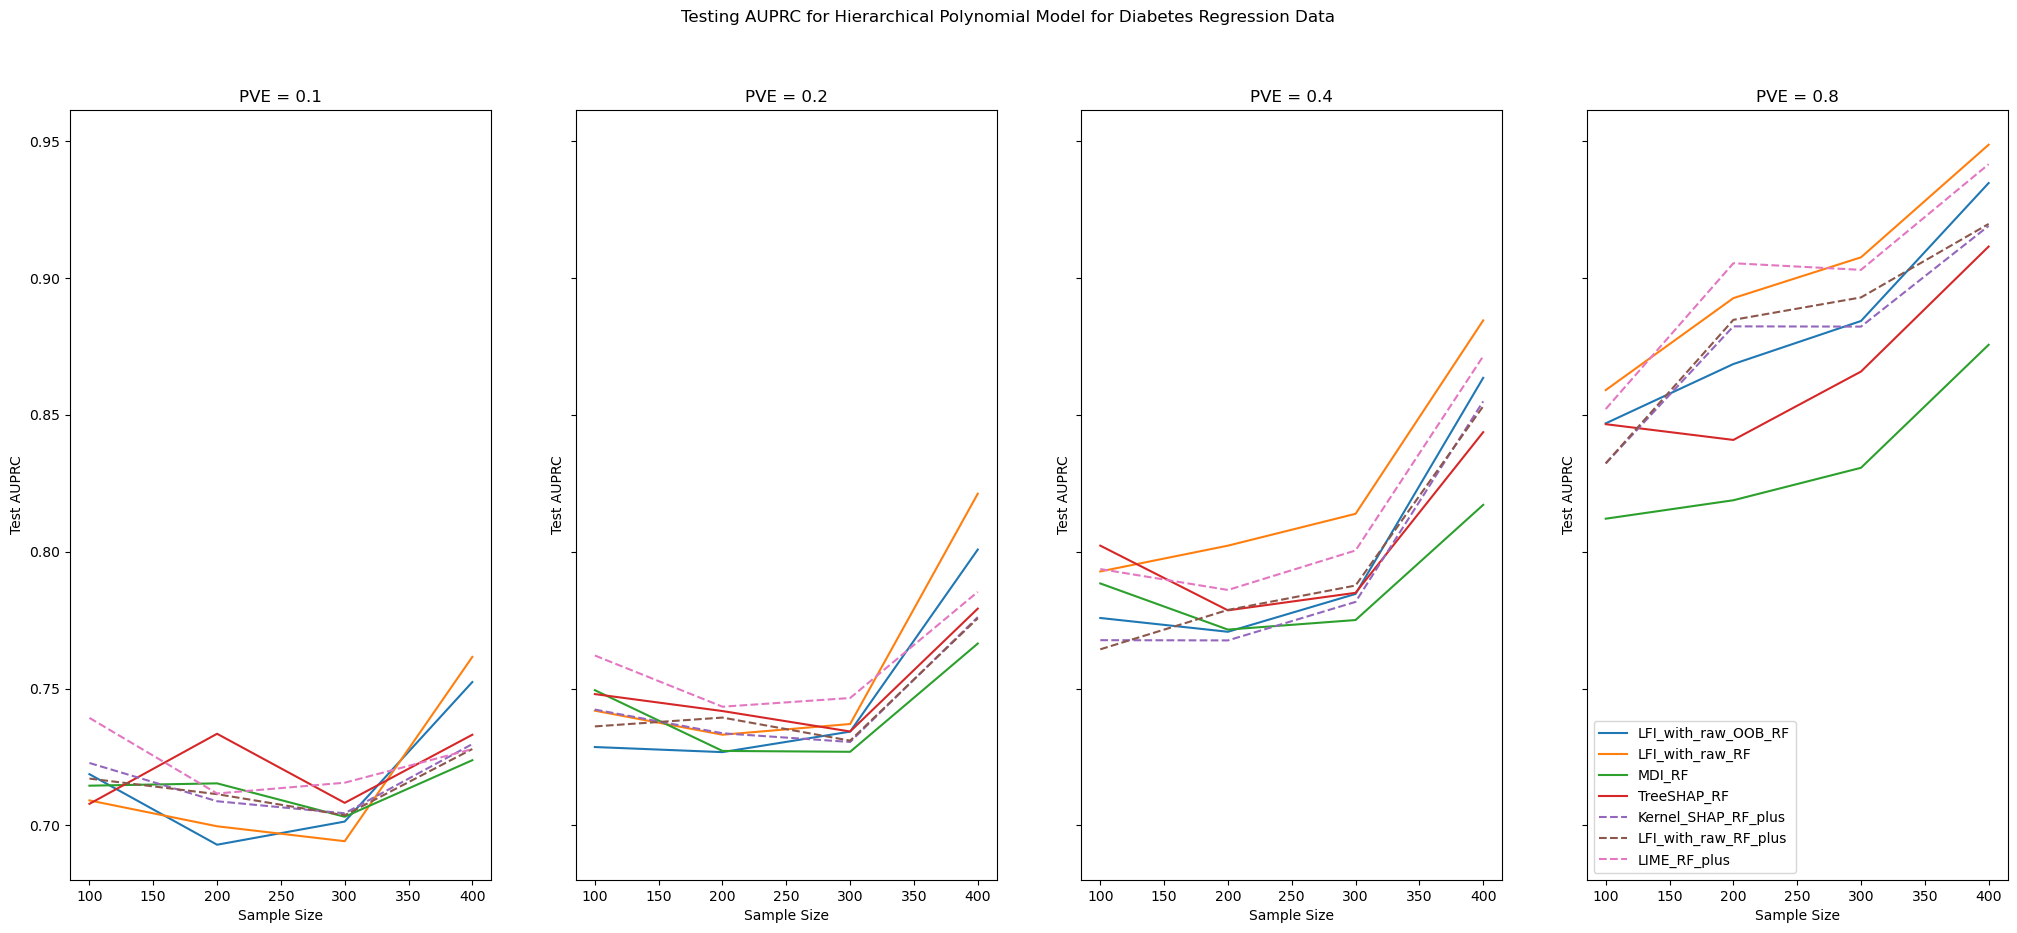

In [122]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auprc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["test_auprc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Test AUPRC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Testing AUPRC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

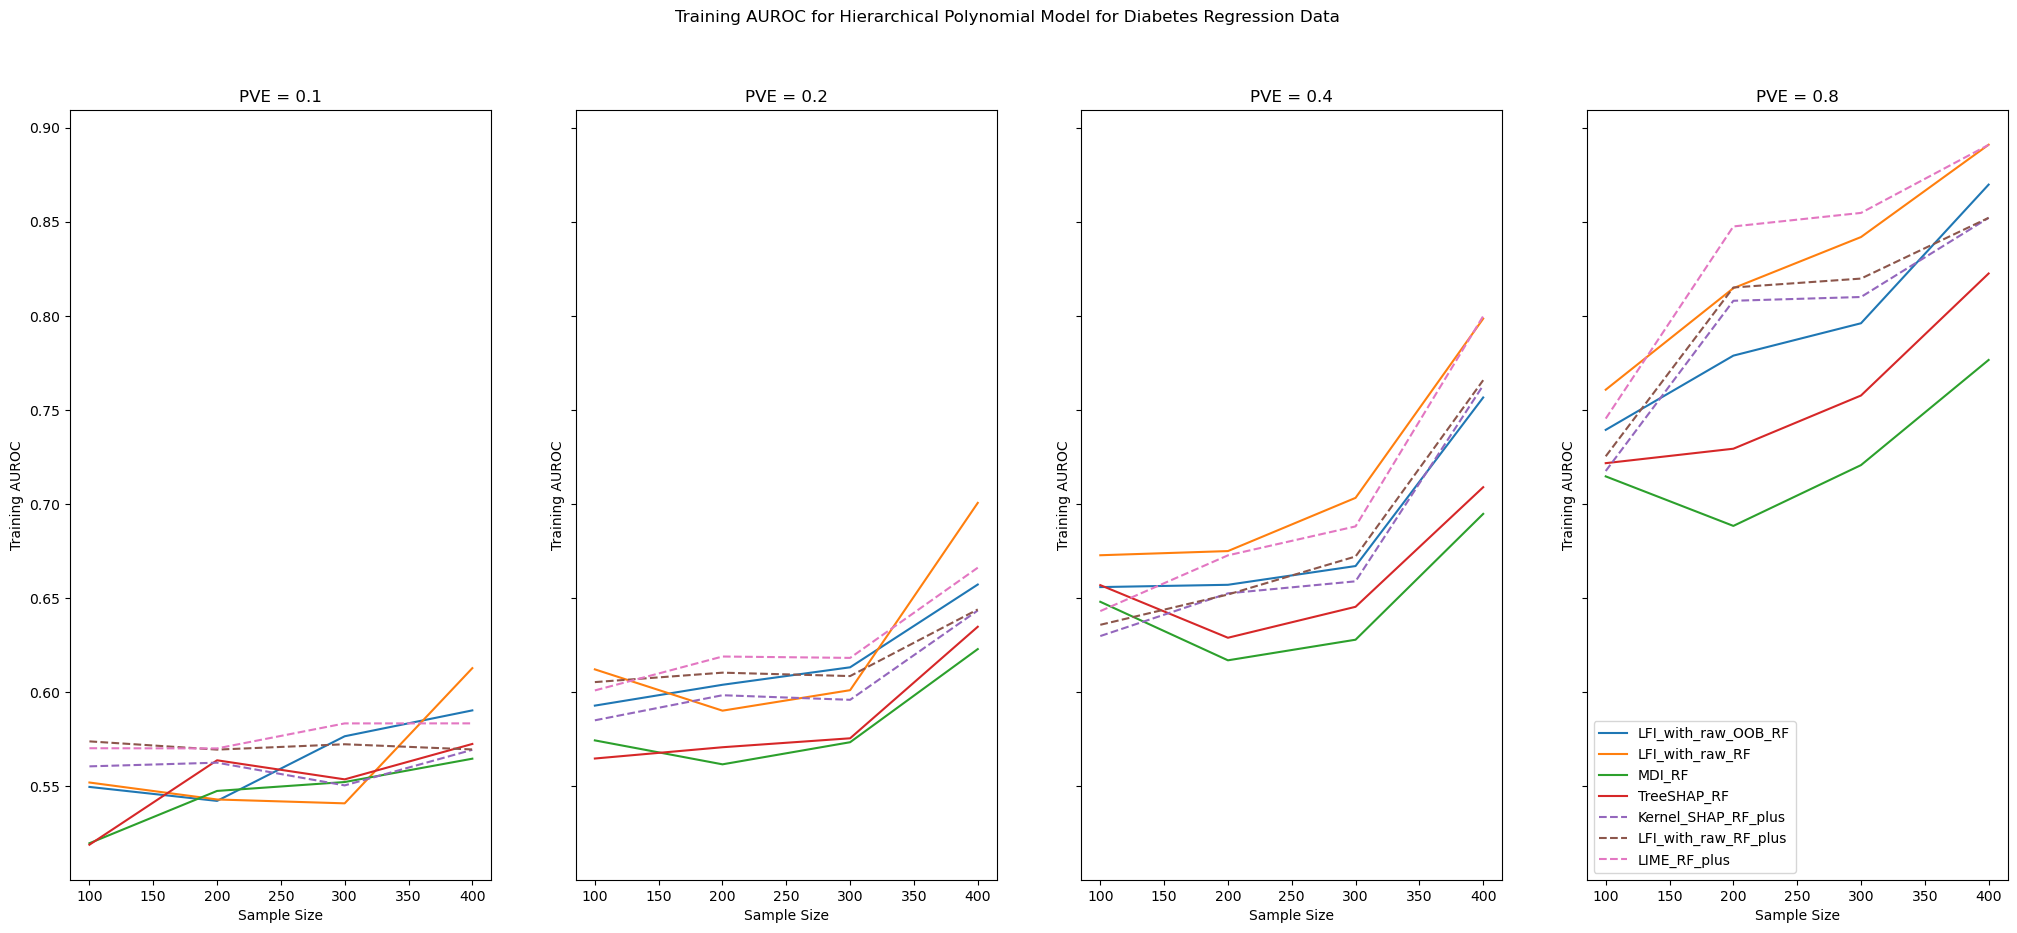

In [123]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auroc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auroc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Training AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Training AUROC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()

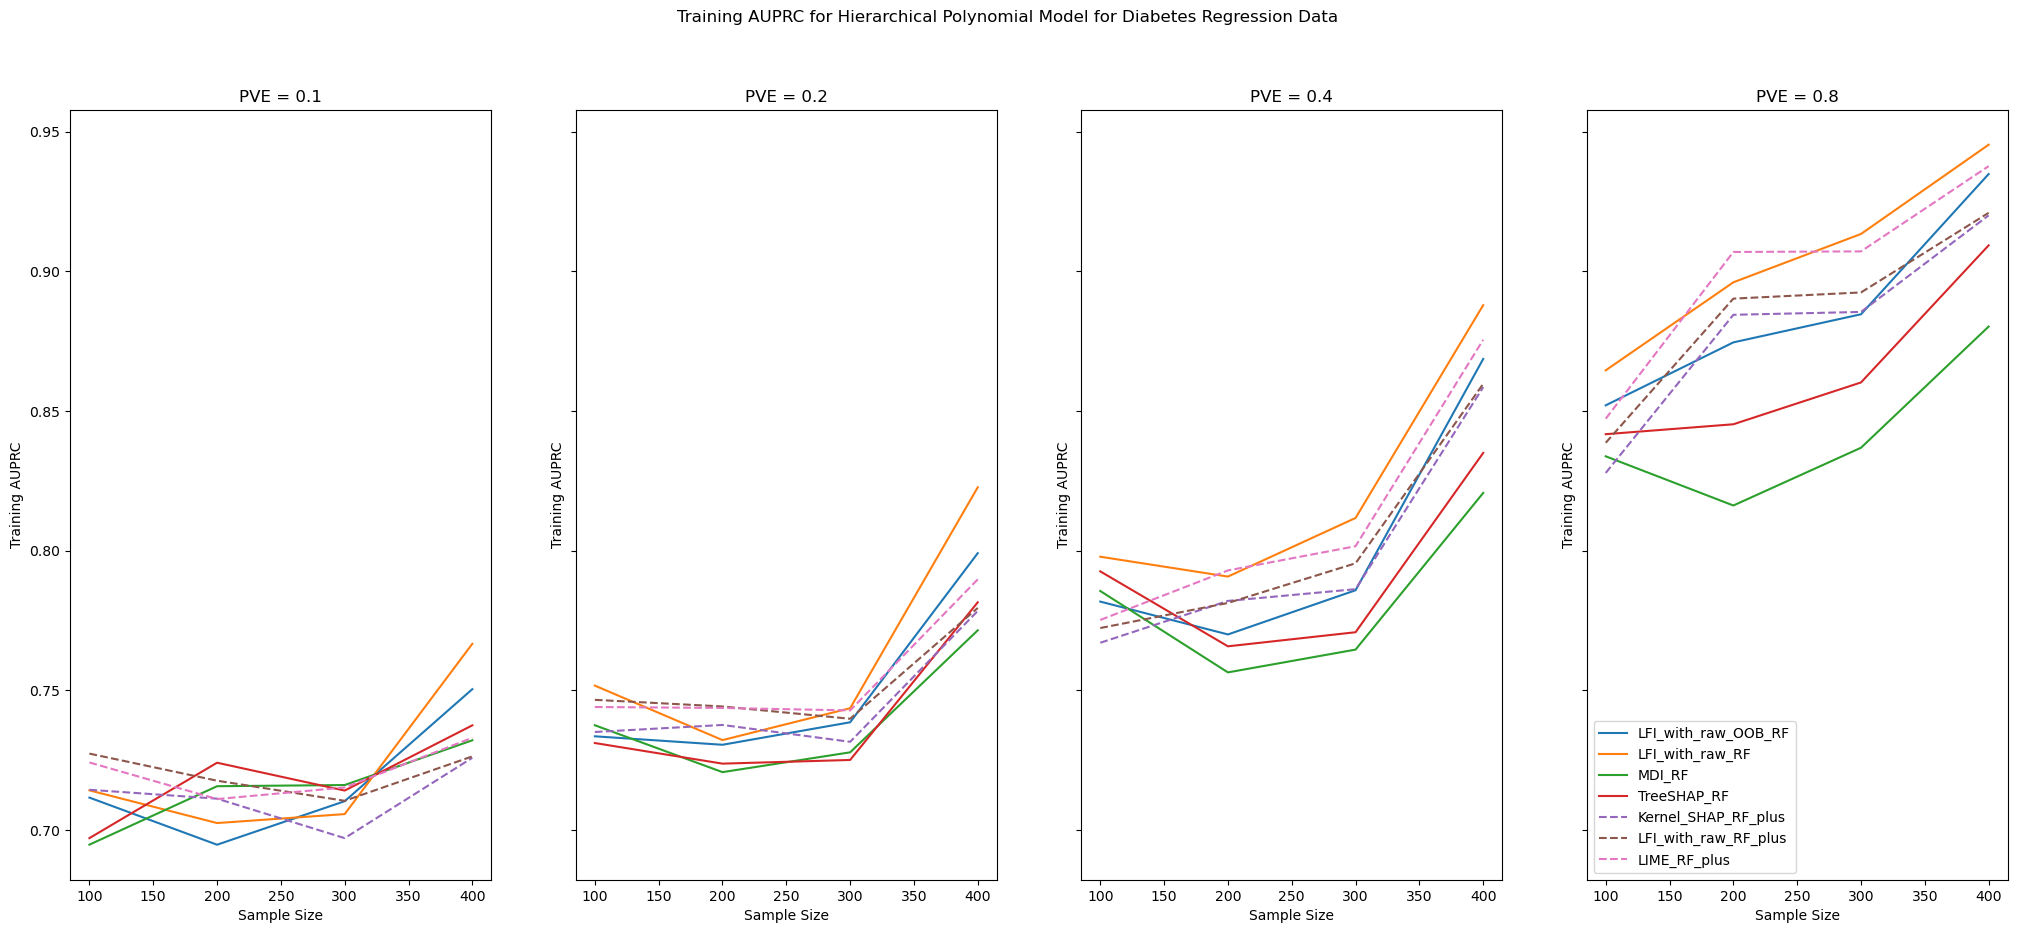

In [124]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 10), sharey=True)

for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if "RF_plus" in m:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auprc"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["train_auprc"], label=m)
    axs[i].set_xlabel('Sample Size')
    axs[i].set_ylabel('Training AUPRC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

fig.suptitle("Training AUPRC for Hierarchical Polynomial Model for Diabetes Regression Data")

# Show the plots
plt.show()